In [1]:
import tensorflow as tf

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from pandas import Series
import math
import numpy
from tensorflow.keras.layers import *
from tensorflow.keras import layers
import pandas as pd

data = pd.read_csv("SeoulBikeData.csv",encoding='CP949')

In [2]:
data

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


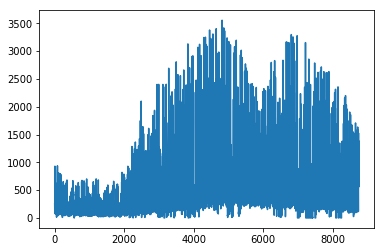

In [3]:
plt.plot(data['Rented Bike Count'])

In [4]:
data['Holiday']=data['Holiday'].factorize()[0]

In [5]:
data['Seasons']=data['Seasons'].factorize()[0]
data['Functioning Day']=data['Functioning Day'].factorize()[0]

In [6]:
data

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,3,0,0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,3,0,0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,3,0,0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,3,0,0


In [7]:
data=data.drop(['Hour'],axis=1)

In [8]:
cols=data.columns[1:]
len(cols)

12

In [9]:
from sklearn.preprocessing import MinMaxScaler
values = data[cols].values.reshape(-1,12)
values = values.astype('float32')
#scaler = MinMaxScaler(feature_range=(0, 1))
scaled = (values-(np.min(values)))/(np.max(values)-(np.min(values)))

In [10]:
train_size = int(len(scaled) * 0.80)
val_size = int(len(scaled) * 0.10)

test_size = len(scaled) - train_size-val_size
train,val, test = scaled[0:train_size,:],scaled[train_size:train_size+val_size,:], scaled[train_size+val_size:,:]
print(len(train),len(val), len(test))

7008 876 876


In [11]:
def create_dataset_multistep(dataset, look_back=1,predict=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back-predict):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i+ look_back-1: i+ look_back+predict-1, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [12]:
look_back = 168
predict=24

trainX, trainY = create_dataset_multistep(train, look_back,predict)
valX, valY = create_dataset_multistep(val, look_back,predict)
testX, testY = create_dataset_multistep(test, look_back,predict)


6816
684
684


In [401]:
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1], trainX.shape[2]))
valX = np.reshape(valX, (valX.shape[0],1, valX.shape[1],valX.shape[2]))
testX = np.reshape(testX, (testX.shape[0],1,testX.shape[1], testX.shape[2] ))

In [319]:
trainY=np.reshape(trainY,(trainY.shape[0],trainY.shape[1],1))
valY=np.reshape(valY,(valY.shape[0],valY.shape[1],1))
testY=np.reshape(testY,(testY.shape[0],testY.shape[1],1))

In [491]:
print(trainX.shape)
print(trainY.shape)

(6816, 168, 12)
(6816, 24)


In [186]:
class CharacterTable(object):
    def __init__(self, chars):
        """Initialize character table.
        # Arguments
            chars: Characters that can appear in the input.
        """
        self.chars = sorted(set(chars))
        self.char_indices = dict((c, i) for i, c in enumerate(self.chars))
        self.indices_char = dict((i, c) for i, c in enumerate(self.chars))

    def encode(self, C, num_rows):
        """One hot encode given string C.
        # Arguments
            num_rows: Number of rows in the returned one hot encoding. This is
                used to keep the # of rows for each data the same.
        """
        x = np.zeros((num_rows, len(self.chars)))
        for i, c in enumerate(C):
            x[i, self.char_indices[c]] = 1
        return x

    def decode(self, x, calc_argmax=True):
        if calc_argmax:
            x = x.argmax(axis=-1)
        return ''.join(self.indices_char[x] for x in x)

### CNN-LSTM

In [91]:
first_input = Input(shape=(168,12),name='input')

in1=Conv1D(filters=64, kernel_size=5, activation='relu',padding='same')(first_input)
#in1= BatchNormalization(scale=False)(in1)

#in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in0= BatchNormalization(scale=False)(in0)
in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1],name='extractor')
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
in1=MaxPooling1D(pool_size=2, name='extractor')(in1)
in1=Flatten()(in1)
in1=RepeatVector(24)(in1)
#in1=Dense(100, activation='relu')(in1)
in1=LSTM(100, return_sequences=True)(in1)
#in1=RepeatVector(24)(in1)
#in1=LSTM(50, return_sequences=True)(in1)
#in1=Dropout(0.3)(in1)
in1=TimeDistributed(Dense(100))(in1)
out=TimeDistributed(Dense(1))(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

checkpoint_path = "saved_weights/bike_1dcnnlstm_multi_exp.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

# fit model9
#history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

In [92]:
model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 168, 12)]         0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 168, 64)           3904      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 168, 64)           12352     
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 168, 64)           4160      
_________________________________________________________________
extractor (MaxPooling1D)     (None, 84, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5376)              0         
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 24, 5376)          0  

In [451]:
history=model.fit(trainX, trainY, epochs=20, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

Train on 6816 samples, validate on 684 samples
Epoch 1/20
6800/6816 [============================>.] - ETA: 0s - loss: 0.0385
Epoch 00001: val_loss improved from inf to 0.03992, saving model to saved_weights/bike_1dcnnlstm_multi_exp.hdf5
6816/6816 [==============================] - 12s 2ms/sample - loss: 0.0385 - val_loss: 0.0399
Epoch 2/20
6800/6816 [============================>.] - ETA: 0s - loss: 0.0209
Epoch 00002: val_loss improved from 0.03992 to 0.03409, saving model to saved_weights/bike_1dcnnlstm_multi_exp.hdf5
6816/6816 [==============================] - 10s 2ms/sample - loss: 0.0209 - val_loss: 0.0341
Epoch 3/20
6800/6816 [============================>.] - ETA: 0s - loss: 0.0158
Epoch 00003: val_loss improved from 0.03409 to 0.02901, saving model to saved_weights/bike_1dcnnlstm_multi_exp.hdf5
6816/6816 [==============================] - 10s 2ms/sample - loss: 0.0158 - val_loss: 0.0290
Epoch 4/20
6800/6816 [============================>.] - ETA: 0s - loss: 0.0122
Epoch 00004

In [ ]:
trainY=np.reshape(trainY,(trainY.shape[0],trainY.shape[1],1))
valY=np.reshape(valY,(valY.shape[0],valY.shape[1],1))
testY=np.reshape(testY,(testY.shape[0],testY.shape[1],1))

In [93]:
model.load_weights("saved_weights/bike_1dcnnlstm_multi_exp.hdf5")

In [45]:
#beat_example=testX[:,0]

beat_example=test[:,0]

In [49]:
testX.shape


(684, 168, 12)

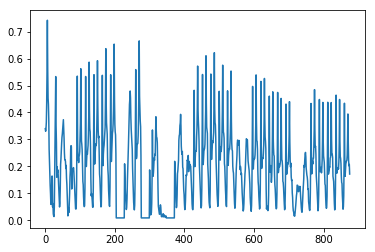

Target Class =  7 corresponding to: [[[0.20641002]
  [0.2581302 ]
  [0.29302084]
  ...
  [0.21434481]
  [0.23173474]
  [0.2452381 ]]

 [[0.21926661]
  [0.27996168]
  [0.32178417]
  ...
  [0.21797372]
  [0.23249966]
  [0.24476857]]

 [[0.24579556]
  [0.3186821 ]
  [0.36537644]
  ...
  [0.22710672]
  [0.23977545]
  [0.25183645]]

 ...

 [[0.20628028]
  [0.2197864 ]
  [0.19667041]
  ...
  [0.24274212]
  [0.24965969]
  [0.24423088]]

 [[0.17695619]
  [0.17741625]
  [0.15110771]
  ...
  [0.25188002]
  [0.24794118]
  [0.22999278]]

 [[0.1502454 ]
  [0.14514881]
  [0.12453461]
  ...
  [0.24788849]
  [0.22984932]
  [0.20200111]]] Obese is [0., 1.]
The real value is 1


In [50]:
example = testX
plt.plot(beat_example)
plt.show()

predict = model.predict(example)
target_class = np.argmax(predict[0])
print("Target Class = ", target_class, "corresponding to:", predict, "Obese is [0., 1.]")

#original code
#print("The real value is",y_ann_data_encoded[example_index])

#code for running standalone 
print("The real value is 1")

In [95]:
last_conv = model.get_layer('conv1d_6') #last_conv= model.layers[8]
grad_model = tf.keras.models.Model([model.inputs], [last_conv.output, model.output])

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(example) #get activations maps + predictions from last conv layer
    #loss = predictions[:, target_class] # the variable loss gets the probability of belonging to the defined class (the predicted class on the model output)
    
    output = conv_outputs[0]
    grads = tape.gradient(predictions, conv_outputs)[0]
    weights = tf.reduce_mean(grads, axis=0)
    
    # Get a ponderated map of filters according to grad importance
    #cam = np.ones(output.shape[0], dtype=np.float32)
    #for index, w in enumerate(weights):
    #    cam += w * output[:, index]

    #time = int(seq.shape[1]/output.shape[0])
    #cam = zoom(cam.numpy(), time, order=1)
    #heatmap = (cam - cam.min())/(cam.max() - cam.min())
    

In [59]:
output.shape

TensorShape([84, 64])

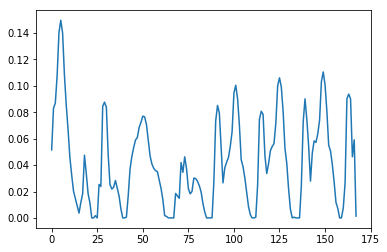

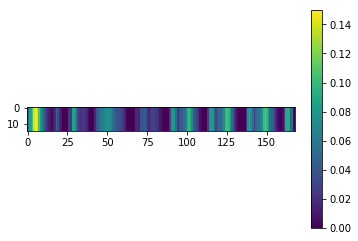

In [98]:
activation_map = output[:,5]
plt.plot(activation_map) 
plt.show() 

Activation_map_image = [activation_map,activation_map,activation_map,activation_map,activation_map,
                        activation_map,activation_map,activation_map,activation_map,activation_map,
                        activation_map,activation_map,activation_map,activation_map,activation_map]
plt.imshow(Activation_map_image) # vmin=-1, vmax=1) #cmap='gray
plt.colorbar()

#c=a.numpy()
#c=a.numpy().reshape(1, -1)



In [453]:
j=[14, 9, 19, 10, 12, 25, 23, 3, 26, 18, 24, 15, 22, 8, 27]

In [455]:
trainY.shape

(6816, 24)

In [460]:
yhat.shape

(24, 1)

In [457]:
yhat = model.predict([testX])


In [459]:
aug_rm=[]
aug_ma=[]
for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.05204
Test RMSE: 0.08328
Test MAE: 0.07731
Test RMSE: 0.08916
Test MAE: 0.05754
Test RMSE: 0.08156
Test MAE: 0.08669
Test RMSE: 0.11138
Test MAE: 0.08881
Test RMSE: 0.12983
Test MAE: 0.05393
Test RMSE: 0.07509
Test MAE: 0.03111
Test RMSE: 0.03475
Test MAE: 0.10470
Test RMSE: 0.12554
Test MAE: 0.05542
Test RMSE: 0.07603
Test MAE: 0.05602
Test RMSE: 0.08478
Test MAE: 0.05241
Test RMSE: 0.07451
Test MAE: 0.04884
Test RMSE: 0.05760
Test MAE: 0.06205
Test RMSE: 0.08062
Test MAE: 0.06705
Test RMSE: 0.07440
Test MAE: 0.04956
Test RMSE: 0.08146
0.08399892131225631
0.06289842


In [411]:
aug_rm=[]
aug_ma=[]
for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.04552
Test RMSE: 0.06025
Test MAE: 0.07051
Test RMSE: 0.08870
Test MAE: 0.04048
Test RMSE: 0.06239
Test MAE: 0.06912
Test RMSE: 0.09877
Test MAE: 0.05444
Test RMSE: 0.08146
Test MAE: 0.04077
Test RMSE: 0.06784
Test MAE: 0.02824
Test RMSE: 0.03517
Test MAE: 0.07196
Test RMSE: 0.11248
Test MAE: 0.04582
Test RMSE: 0.06733
Test MAE: 0.03949
Test RMSE: 0.06575
Test MAE: 0.05305
Test RMSE: 0.08948
Test MAE: 0.06094
Test RMSE: 0.07716
Test MAE: 0.05562
Test RMSE: 0.07141
Test MAE: 0.06479
Test RMSE: 0.08789
Test MAE: 0.04935
Test RMSE: 0.07361
0.07597829606223865
0.052673478


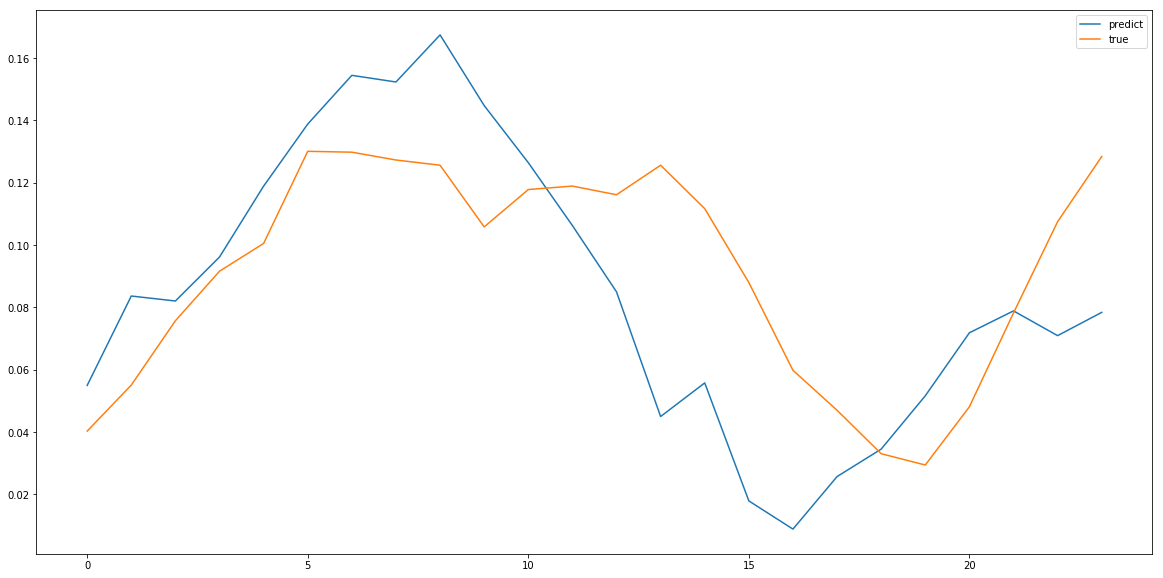

Test RMSE: 0.03517
Test MAE: 0.02824
Test MSE: 0.00124
Test RMSE: 126.15754
Test MAE: 101.26804


In [412]:
#1dcnn-lstm

from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*23]
testy=testY[24*23]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)


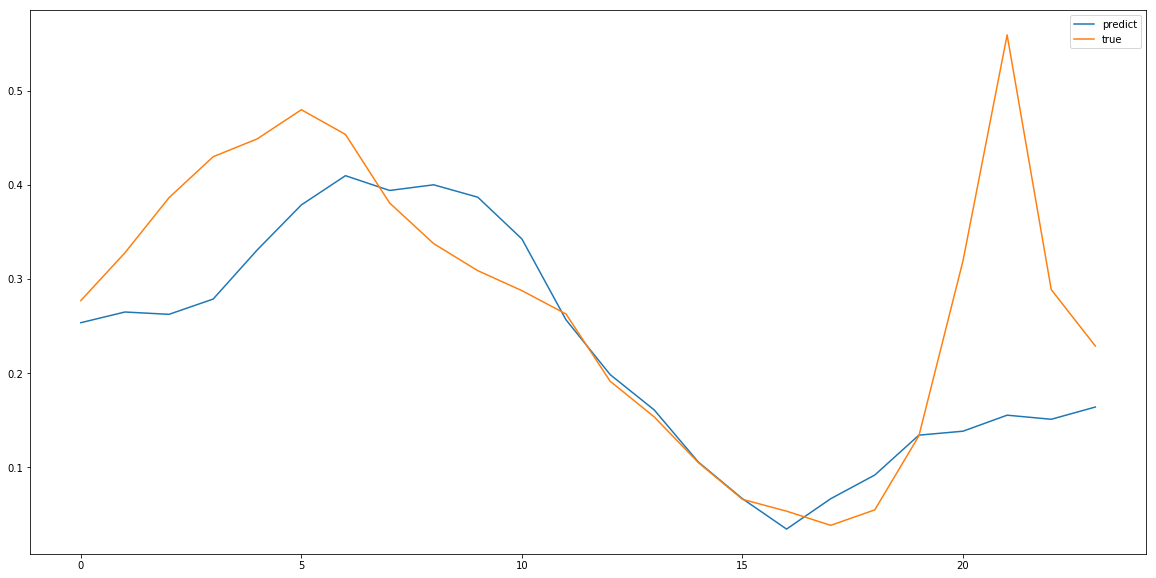

Test RMSE: 0.11248
Test MAE: 0.07196
Test MSE: 0.01265
Test RMSE: 403.40529
Test MAE: 258.10022


In [413]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*3]
testy=testY[24*3]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)


In [414]:
def gradient_importance(seq, model):

    seq = tf.Variable(seq[np.newaxis,:,:], dtype=tf.float32)

    with tf.GradientTape() as tape:
        predictions = model(seq)

    grads = tape.gradient(predictions, seq)
    grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    
    return grads



def activation_grad(seq, model):
    
    seq = seq[np.newaxis,:,:]
    grad_model = Model([model.inputs], 
                       [model.get_layer('extractor').output, 
                        model.output])

    # Obtain the predicted value and the intermediate filters
    with tf.GradientTape() as tape:
        seq_outputs, predictions = grad_model(seq)

    # Extract filters and gradients
    output = seq_outputs[0]
    grads = tape.gradient(predictions, seq_outputs)[0]

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=0)
    
    # Get a ponderated map of filters according to grad importance
    cam = np.ones(output.shape[0], dtype=np.float32)
    for index, w in enumerate(weights):
        cam += w * output[:, index]

    time = int(seq.shape[1]/output.shape[0])
    cam = zoom(cam.numpy(), time, order=1)
    heatmap = (cam - cam.min())/(cam.max() - cam.min())
    
    return heatmap

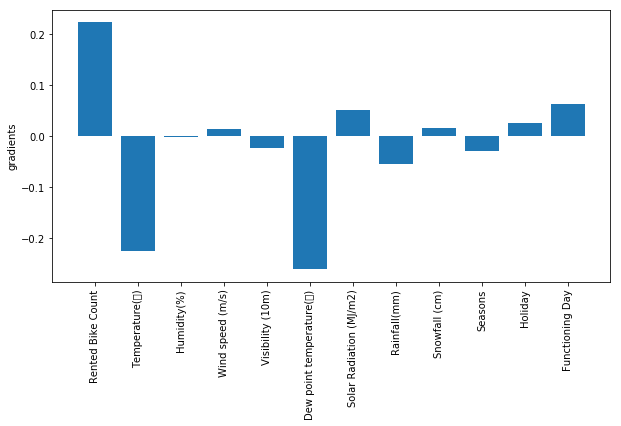

In [415]:
columns=cols
X_test=testX.copy()
id_=24*23
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

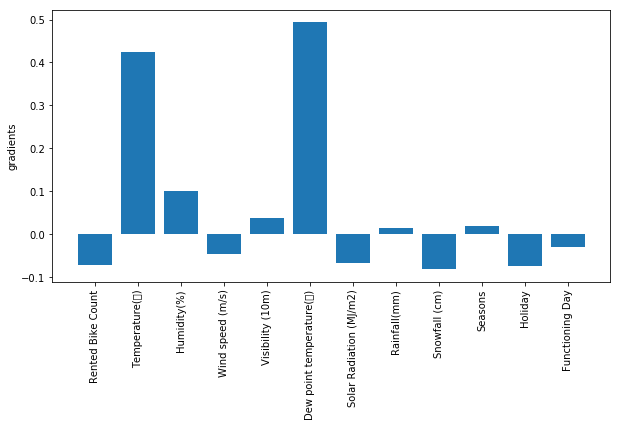

In [437]:
columns=cols
X_test=testX.copy()
id_=24*10
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

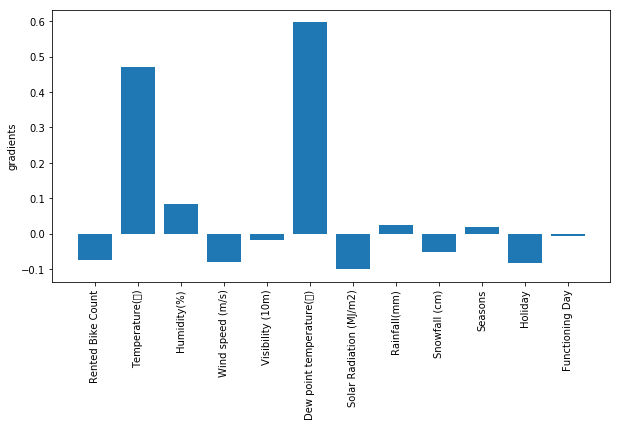

In [432]:
columns=cols
X_test=testX.copy()
id_=24*3
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

In [378]:
id_=24*23

testX_inverse=X_test[id_][:,0]*(np.max(values)-np.min(values))+np.min(values)
testX_inverse

array([ 994., 1037.,  969., 1018.,  974., 1031.,  877.,  735.,  644.,
        685.,  655.,  576.,  592.,  443.,  335.,  258.,  165.,   92.,
        114.,  191.,  371.,  457.,  583.,  645.,  776.,  905., 1054.,
       1047., 1026., 1039.,  902.,  759.,  719.,  682.,  632.,  532.,
        457.,  277.,  190.,  133.,   88.,  167.,  418.,  991., 1751.,
        889.,  651.,  745.,  785.,  785.,  793.,  839.,  968., 1233.,
       1904., 1304., 1030., 1019.,  910.,  629.,  478.,  422.,  286.,
        202.,  119.,  141.,  369.,  934., 1818.,  955.,  659.,  699.,
        788.,  798.,  790.,  861.,  967., 1269., 1857., 1317., 1078.,
       1020.,  922.,  378.,  119.,  159.,  129.,  112.,   97.,  118.,
        299.,  788., 1622.,  867.,  611.,  649.,  697.,  623.,  474.,
        550.,  755., 1101., 1679., 1113.,  936.,  838.,  825.,  571.,
        443.,  382.,  271.,  164.,  121.,  133.,  332.,  848., 1671.,
        883.,  603.,  644.,  717.,  678.,  692.,  716.,  759., 1101.,
       1591., 1032.,

[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


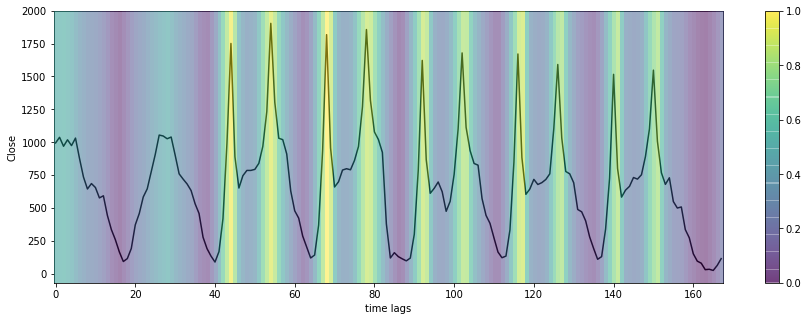

In [379]:
from scipy.ndimage import zoom
import random
import pylab

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(X_test[id_])
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('Close'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

np.set_printoptions(False)

In [418]:
id_=24*3

testX_inverse=X_test[id_][:,0]*(np.max(values)-np.min(values))+np.min(values)
testX_inverse

array([ 630.,  916.,  962.,  948.,  385.,  535.,  651.,  645.,  624.,
        670.,  625.,  512.,  434.,  326.,  184.,  123.,  117.,  161.,
        436., 1070., 1888., 1021.,  771.,  796.,  737.,  815.,  838.,
        884., 1069., 1274., 1987., 1377., 1026.,  979.,  906.,  658.,
        488.,  440.,  283.,  182.,  150.,  162.,  394., 1005., 1883.,
        982.,  684.,  782.,  881.,  847.,  903.,  965., 1110., 1357.,
       2074., 1442., 1186., 1147.,  948.,  527.,  294.,  324.,  287.,
        227.,  146.,  141.,  402., 1060., 1907.,  996.,  717.,  818.,
        907.,  983.,  963.,  994., 1185., 1462., 2094., 1507., 1176.,
       1069., 1088.,  798.,  584.,  524.,  362.,  242.,  147.,  154.,
        433., 1055., 1899., 1011.,  696.,  852.,  926.,  968., 1040.,
       1094., 1206., 1569., 2254., 1561., 1269., 1197., 1115.,  806.,
        642.,  560.,  369.,  251.,  166.,  153.,  403., 1024., 1906.,
       1027.,  751.,  880., 1023., 1130., 1160., 1251., 1424., 1730.,
       2314., 1568.,

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(-0.5, 167.5, 119.5, -0.5)

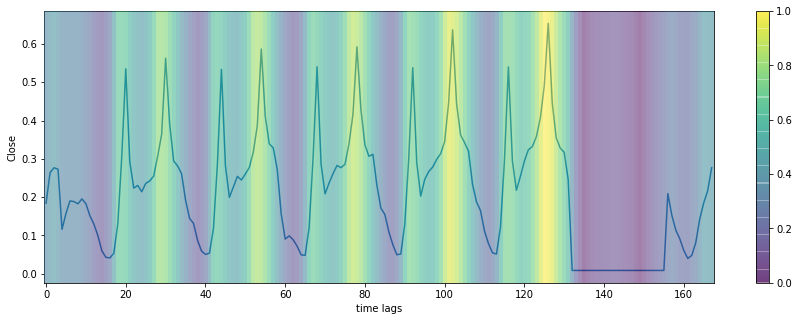

In [436]:
from scipy.ndimage import zoom
import random
import pylab

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(X_test[id_][:,0])
#plt.plot(X_test[id_])
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('Close'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(-0.5, 167.5, 119.5, -0.5)

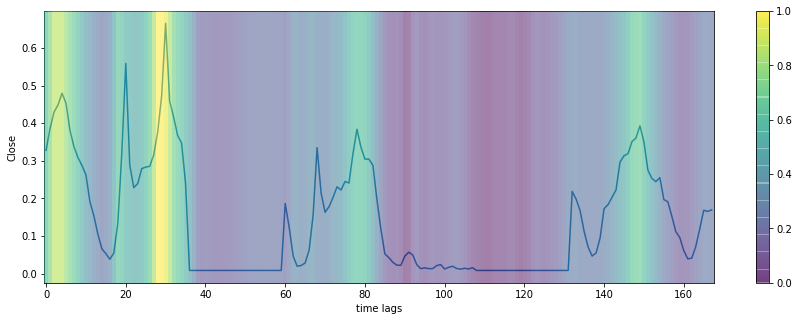

In [438]:
from scipy.ndimage import zoom
import random
import pylab

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(X_test[id_][:,0])
#plt.plot(X_test[id_])
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('Close'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()


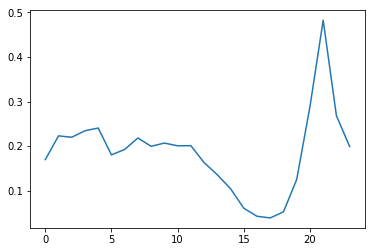

In [443]:
plt.plot(testY[24*10])

In [426]:
data

,Date,Rented Bike Count,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0
1,01/12/2017,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0
2,01/12/2017,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0
3,01/12/2017,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0
4,01/12/2017,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,3,0,0
8756,30/11/2018,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,3,0,0
8757,30/11/2018,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,3,0,0
8758,30/11/2018,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,3,0,0


In [423]:
X_test[id_][:,1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [100]:
class CharacterTable(object):
    def __init__(self, chars):
        """Initialize character table.
        # Arguments
            chars: Characters that can appear in the input.
        """
        self.chars = sorted(set(chars))
        self.char_indices = dict((c, i) for i, c in enumerate(self.chars))
        self.indices_char = dict((i, c) for i, c in enumerate(self.chars))

    def encode(self, C, num_rows):
        """One hot encode given string C.
        # Arguments
            num_rows: Number of rows in the returned one hot encoding. This is
                used to keep the # of rows for each data the same.
        """
        x = np.zeros((num_rows, len(self.chars)))
        for i, c in enumerate(C):
            x[i, self.char_indices[c]] = 1
        return x

    def decode(self, x, calc_argmax=True):
        if calc_argmax:
            x = x.argmax(axis=-1)
        return ''.join(self.indices_char[x] for x in x)

(1, 168, 12)


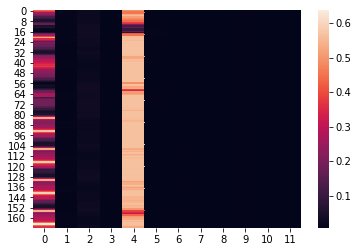

conv1d_6/kernel:0 (5, 12, 64)
[[[-0.11846265 -0.005964    0.0760607  ...  0.14223646 -0.02399816
    0.00669113]
  [-0.01966429  0.08651844 -0.01961423 ...  0.08897225  0.03365015
    0.14119874]
  [ 0.12541111  0.10259706  0.09493428 ... -0.03337131 -0.0601231
    0.05810035]
  ...
  [ 0.05871388 -0.09733332  0.01741126 ...  0.09048436  0.02659305
   -0.08500329]
  [-0.10736275  0.01289233  0.08786753 ...  0.01217355 -0.120435
   -0.03978458]
  [-0.03324609  0.0498337  -0.05823216 ... -0.02134682  0.05056354
    0.04436835]]

 [[ 0.03304145  0.11034056  0.01078541 ...  0.0207557  -0.0825702
    0.02518365]
  [ 0.06671546  0.04189159 -0.01437124 ... -0.0151922  -0.10264261
    0.11105047]
  [ 0.03747652 -0.12954132  0.12212461 ... -0.00816608 -0.0912732
    0.12530996]
  ...
  [ 0.08533593 -0.12063032  0.12202358 ... -0.00589108 -0.03024654
    0.03677069]
  [-0.08499462  0.04640219 -0.03904873 ...  0.12162175 -0.09256683
    0.09572931]
  [-0.04262507 -0.11473093  0.00514551 ... -0.01

In [103]:
from tensorflow.keras.models import Model

chars = '0123456789+ '
ctable = CharacterTable(chars)
i = 9
output_final = model.predict(np.array([testX[i]]))

#print(ctable.decode(valX[i]),
 #     ctable.decode(valY[i]),
  #    ctable.decode(output_final[0]))

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[0].output)
output = intermediate_layer_model.predict(np.array([testX[i]]))
print(output.shape)

import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# h = np.reshape(output[0], (-1, 8))
# sns.heatmap(h)
sns.heatmap(output[0])
plt.show()

# %% Print weights.
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

# suppress scientific notation
np.set_printoptions(suppress=True)
for name, weight in zip(names, weights):
    print(name, weight.shape)
    print(weight)

### Timedistributed 1d-CNN

In [65]:
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1], trainX.shape[2]))
valX = np.reshape(valX, (valX.shape[0],1, valX.shape[1],valX.shape[2]))
testX = np.reshape(testX, (testX.shape[0],1,testX.shape[1], testX.shape[2] ))

In [41]:
trainY=np.reshape(trainY,(trainY.shape[0],1,trainY.shape[1],1))
valY=np.reshape(valY,(valY.shape[0],1,valY.shape[1],1))
testY=np.reshape(testY,(testY.shape[0],1,testY.shape[1],1))

In [42]:
first_input = Input(shape=(None,48,8))

in1=TimeDistributed(Conv1D(filters=64, kernel_size=5, activation='relu',padding='same'))(first_input)
#in1= BatchNormalization(scale=False)(in1)

#in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu',padding='same'))(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1],name='extractor')
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
in1=TimeDistributed(MaxPooling1D(pool_size=2))(in1)
#in1=TimeDistributed(Flatten())(in1)

#in1=Dense(100, activation='relu')(in1)
out=TimeDistributed(Dense(1))(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

model.summary()

checkpoint_path = "saved_weights/bike_time_1dcnn_multistep.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
# fit model

# fit model9
#history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

# fit model9
history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, None, 48, 8)]     0         
_________________________________________________________________
time_distributed_8 (TimeDist (None, None, 48, 64)      2624      
_________________________________________________________________
time_distributed_9 (TimeDist (None, None, 48, 64)      4160      
_________________________________________________________________
time_distributed_10 (TimeDis (None, None, 24, 64)      0         
_________________________________________________________________
time_distributed_11 (TimeDis (None, None, 24, 1)       65        
Total params: 6,849
Trainable params: 6,849
Non-trainable params: 0
_________________________________________________________________
Train on 6936 samples, validate on 804 samples
Epoch 1/200
6500/6936 [===========================>..] - ETA: 0s - loss: 0.0

Epoch 32/200
6600/6936 [===========================>..] - ETA: 0s - loss: 0.0223
Epoch 00032: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 35us/sample - loss: 0.0222 - val_loss: 0.0411
Epoch 33/200
6500/6936 [===========================>..] - ETA: 0s - loss: 0.0222
Epoch 00033: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 35us/sample - loss: 0.0222 - val_loss: 0.0415
Epoch 34/200
6500/6936 [===========================>..] - ETA: 0s - loss: 0.0221
Epoch 00034: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 35us/sample - loss: 0.0222 - val_loss: 0.0413
Epoch 35/200
6500/6936 [===========================>..] - ETA: 0s - loss: 0.0221
Epoch 00035: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 35us/sample - loss: 0.0221 - val_loss: 0.0413
Epoch 36/200
6500/6936 [===========================>..] - ETA: 0s - loss: 0.0221
Epoch 00036: va

6500/6936 [===========================>..] - ETA: 0s - loss: 0.0211
Epoch 00104: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 35us/sample - loss: 0.0211 - val_loss: 0.0428
Epoch 105/200
6600/6936 [===========================>..] - ETA: 0s - loss: 0.0211
Epoch 00105: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 34us/sample - loss: 0.0211 - val_loss: 0.0429
Epoch 106/200
6400/6936 [==========================>...] - ETA: 0s - loss: 0.0211
Epoch 00106: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 35us/sample - loss: 0.0211 - val_loss: 0.0431
Epoch 107/200
6500/6936 [===========================>..] - ETA: 0s - loss: 0.0210
Epoch 00107: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 35us/sample - loss: 0.0210 - val_loss: 0.0427
Epoch 108/200
6500/6936 [===========================>..] - ETA: 0s - loss: 0.0211
Epoch 00108: val_loss di

6600/6936 [===========================>..] - ETA: 0s - loss: 0.0206
Epoch 00176: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 35us/sample - loss: 0.0206 - val_loss: 0.0434
Epoch 177/200
6700/6936 [===========================>..] - ETA: 0s - loss: 0.0206
Epoch 00177: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 34us/sample - loss: 0.0206 - val_loss: 0.0434
Epoch 178/200
6600/6936 [===========================>..] - ETA: 0s - loss: 0.0204
Epoch 00178: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 35us/sample - loss: 0.0205 - val_loss: 0.0434
Epoch 179/200
6500/6936 [===========================>..] - ETA: 0s - loss: 0.0206
Epoch 00179: val_loss did not improve from 0.04019
6936/6936 [==============================] - 0s 35us/sample - loss: 0.0205 - val_loss: 0.0445
Epoch 180/200
6500/6936 [===========================>..] - ETA: 0s - loss: 0.0206
Epoch 00180: val_loss di

In [43]:
model.load_weights("saved_weights/bike_time_1dcnn_multistep.hdf5")

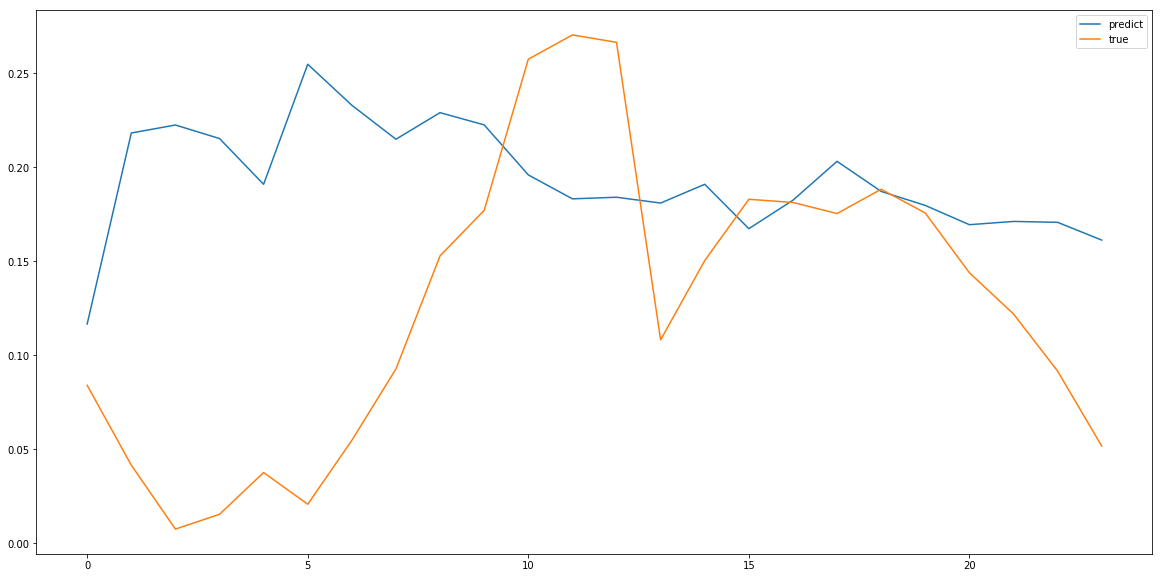

Test RMSE: 0.11160
Test MAE: 0.08716
Test MSE: 0.01246
Test RMSE: 400.27653
Test MAE: 312.60864


In [44]:
#timedist 1dcnn(5,3,1)

from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[15]
testy=testY[15]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)



### Bidirectional LSTM

In [49]:
from tensorflow.keras.models import Model

first_input = Input(shape=(48,8))


in1=Bidirectional(LSTM(150))(first_input)
in1=Dense(24,activation='relu')(in1)
model=Model(first_input,in1)
model.compile(optimizer='adam', loss='mse')
model.summary()
checkpoint_path = "saved_weights/bike_timebilstm.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
# fit model
model.fit(trainX, trainY,validation_data=[valX,valY], epochs=200, verbose=1,callbacks=[cb])

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 48, 8)]           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 300)               190800    
_________________________________________________________________
dense_14 (Dense)             (None, 24)                7224      
Total params: 198,024
Trainable params: 198,024
Non-trainable params: 0
_________________________________________________________________
Train on 6936 samples, validate on 804 samples
Epoch 1/200
6912/6936 [============================>.] - ETA: 0s - loss: 0.0187
Epoch 00001: val_loss improved from inf to 0.02981, saving model to saved_weights/bike_timebilstm.hdf5
6936/6936 [==============================] - 7s 1ms/sample - loss: 0.0188 - val_loss: 0.0298
Epoch 2/200
6848/6936 [============================>.] - ET

KeyboardInterrupt: 

In [50]:
model.load_weights("saved_weights/bike_timebilstm.hdf5")

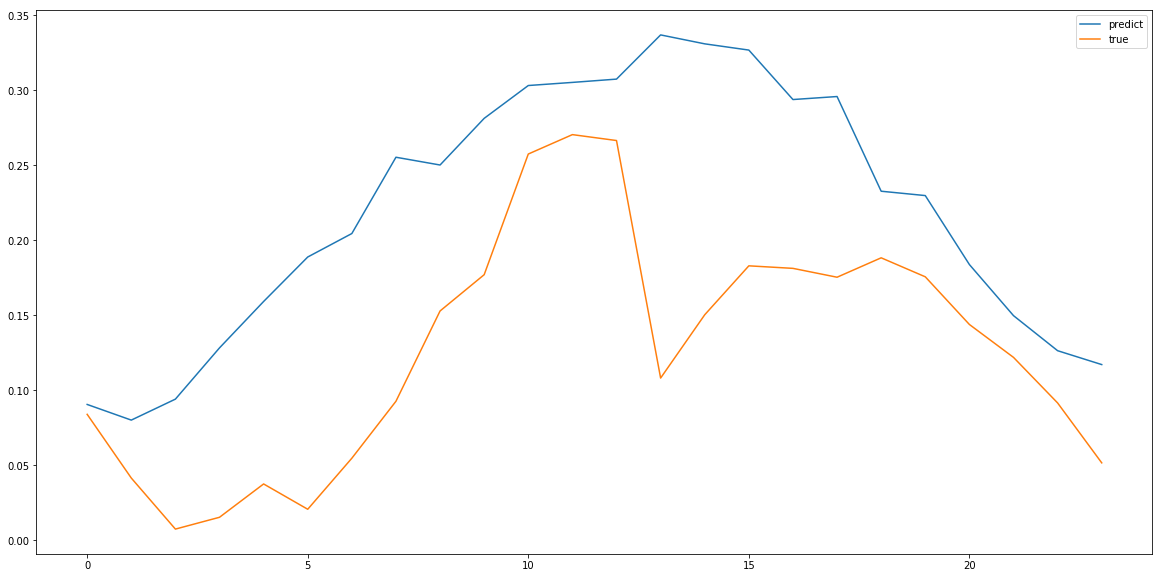

Test RMSE: 0.10889
Test MAE: 0.09261
Test MSE: 0.01186
Test RMSE: 390.56252
Test MAE: 332.14767


In [52]:

from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[15]
testy=testY[15]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)


### 1d-CNN

In [537]:
first_input = Input(shape=(168,12))

in1=Conv1D(filters=128, kernel_size=5, activation='relu',padding='same')(first_input)
#in1= BatchNormalization(scale=False)(in1)

in1=Conv1D(filters=128, kernel_size=3, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in0)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=128, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1],name='extractor')
#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
in1=MaxPooling1D(pool_size=2, name='extractor')(in1)
in1=Flatten()(in1)
in1=Dense(100, activation='relu')(in1)
out=Dense(24)(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

model.summary()

checkpoint_path = "saved_weights/bike_1dcnn_multi_exp1.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)
# fit model


Model: "model_168"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_68 (InputLayer)        [(None, 168, 12)]         0         
_________________________________________________________________
conv1d_155 (Conv1D)          (None, 168, 128)          7808      
_________________________________________________________________
conv1d_156 (Conv1D)          (None, 168, 128)          49280     
_________________________________________________________________
conv1d_157 (Conv1D)          (None, 168, 128)          16512     
_________________________________________________________________
extractor (MaxPooling1D)     (None, 84, 128)           0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 10752)             0         
_________________________________________________________________
dense_67 (Dense)             (None, 100)               10

In [525]:
model.fit(trainX, trainY,validation_data=[valX,valY],epochs=200, verbose=1,callbacks=[cb])

Train on 6816 samples, validate on 684 samples
Epoch 1/200
6688/6816 [============================>.] - ETA: 0s - loss: 0.0127
Epoch 00001: val_loss improved from inf to 0.02291, saving model to saved_weights/bike_1dcnn_multi_exp1.hdf5
6816/6816 [==============================] - 3s 448us/sample - loss: 0.0126 - val_loss: 0.0229
Epoch 2/200
6656/6816 [============================>.] - ETA: 0s - loss: 0.0077
Epoch 00002: val_loss improved from 0.02291 to 0.02132, saving model to saved_weights/bike_1dcnn_multi_exp1.hdf5
6816/6816 [==============================] - 3s 401us/sample - loss: 0.0077 - val_loss: 0.0213
Epoch 3/200
6784/6816 [============================>.] - ETA: 0s - loss: 0.0058
Epoch 00003: val_loss improved from 0.02132 to 0.02032, saving model to saved_weights/bike_1dcnn_multi_exp1.hdf5
6816/6816 [==============================] - 3s 403us/sample - loss: 0.0058 - val_loss: 0.0203
Epoch 4/200
6688/6816 [============================>.] - ETA: 0s - loss: 0.0044
Epoch 00004: 

KeyboardInterrupt: 

In [538]:
model.load_weights("saved_weights/bike_1dcnn_multi_exp1.hdf5")

In [527]:
j

[14, 9, 19, 10, 12, 25, 23, 3, 26, 18, 24, 15, 22, 8, 27]

In [528]:
aug_rm=[]
aug_ma=[]
for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.04658
Test RMSE: 0.06625
Test MAE: 0.05539
Test RMSE: 0.06710
Test MAE: 0.03198
Test RMSE: 0.04030
Test MAE: 0.07159
Test RMSE: 0.08872
Test MAE: 0.07275
Test RMSE: 0.09985
Test MAE: 0.04384
Test RMSE: 0.05431
Test MAE: 0.03746
Test RMSE: 0.04437
Test MAE: 0.05109
Test RMSE: 0.07155
Test MAE: 0.04701
Test RMSE: 0.05583
Test MAE: 0.03824
Test RMSE: 0.04796
Test MAE: 0.03720
Test RMSE: 0.04310
Test MAE: 0.06678
Test RMSE: 0.07933
Test MAE: 0.05523
Test RMSE: 0.07764
Test MAE: 0.11019
Test RMSE: 0.12952
Test MAE: 0.04859
Test RMSE: 0.06474
0.0687045010368848
0.05426176


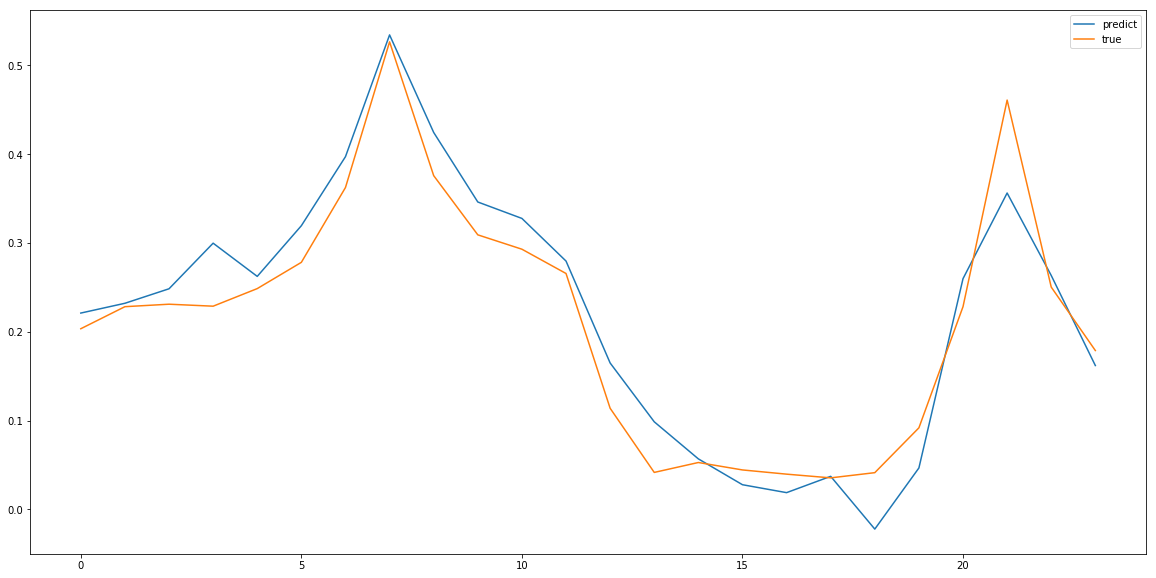

Test RMSE: 0.04030
Test MAE: 0.03198
Test MSE: 0.00162
Test RMSE: 144.53520
Test MAE: 114.68655


In [529]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[24*19]
testy=testY[24*19]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)


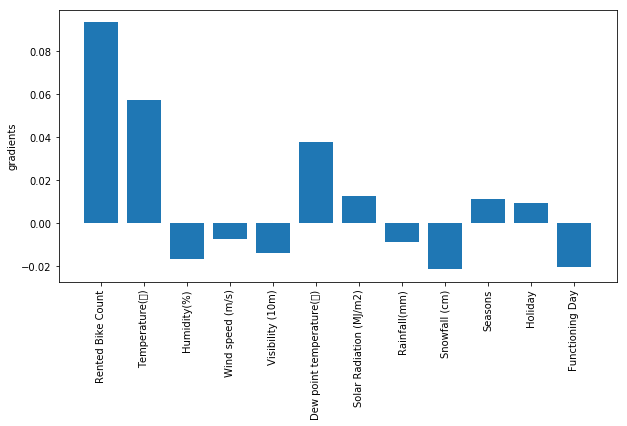

In [530]:

columns=cols
X_test=testX.copy()
id_=24*19
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

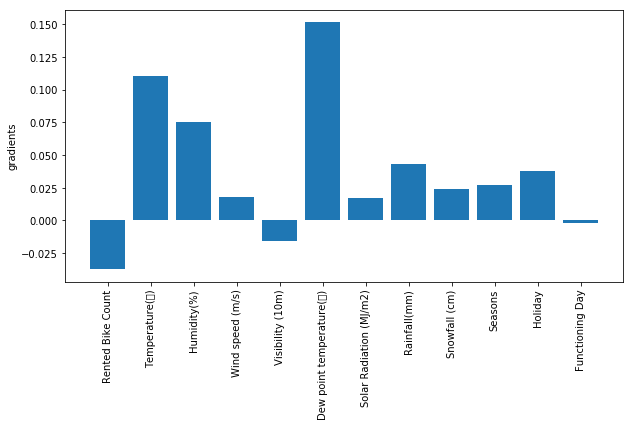

In [533]:

columns=cols
X_test=testX.copy()
id_=24*8
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

In [534]:

testX_inverse=X_test[id_][:,0]*(np.max(values)-np.min(values))+np.min(values)
testX_inverse

#X_test[id_][:,0].shape

array([1023., 1130., 1160., 1251., 1424., 1730., 2314., 1568., 1242.,
       1146., 1106.,  851.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,
         -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,
         -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,
        720.,  517.,  378.,  296.,  188.,  112.,  141.,  259.,  481.,
        632.,  747.,  963., 1145., 1355., 1511., 1579., 1690., 1596.,
       1335., 1180., 1077., 1001.,  912.,  656.,  520.,  346.,  206.,
        161.,  107.,  166.,  448., 1115., 1975., 1005.,  790.,  829.,
        971.,  986.,  993., 1100., 1318., 1664., 2357., 1618., 1464.,
       1289., 1215.,  829.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,
         -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,
         -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,
        639.,  410.,  136.,   40.,   47.,   71.,  194.,  526., 1171.,
        740.,  555.,  608.,  697.,  798.,  767.,  848.,  834., 1115.,
       1347., 1176.,

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]


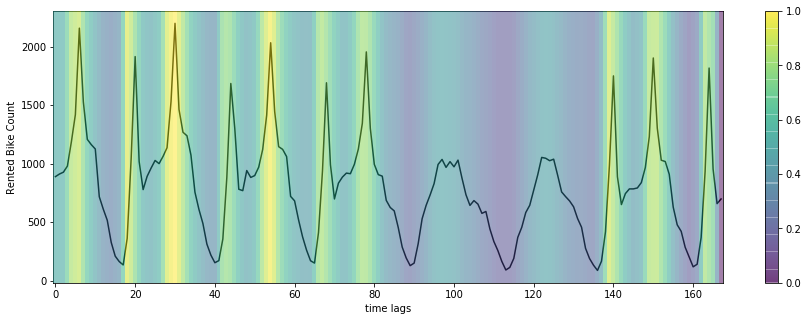

In [532]:
from scipy.ndimage import zoom
import random
import pylab

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('Rented Bike Count'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

np.set_printoptions(False)

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


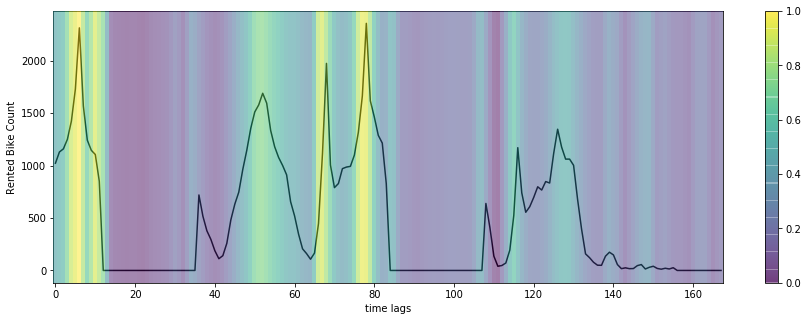

In [535]:
from scipy.ndimage import zoom
import random
import pylab

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('Rented Bike Count'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

np.set_printoptions(False)

In [574]:
import numpy as np
from tensorflow.keras.models import Model
import cv2

def ScoreCam(model, img_array, layer_name, max_N=-1):

    cls = np.argmax(model.predict(img_array))
    act_map_array = Model(inputs=model.input, outputs=model.get_layer(layer_name).output).predict(img_array)
    
    # extract effective maps
    if max_N != -1:
        act_map_std_list = [np.std(act_map_array[0,:,k]) for k in range(act_map_array.shape[3])]
        unsorted_max_indices = np.argpartition(-np.array(act_map_std_list), max_N)[:max_N]
        max_N_indices = unsorted_max_indices[np.argsort(-np.array(act_map_std_list)[unsorted_max_indices])]
        act_map_array = act_map_array[:,:,:,max_N_indices]

    input_shape = model.layers[0].output_shape[0][1:]  # get input shape
    # 1. upsample to original input size
    act_map_resized_list = [cv2.resize(act_map_array[0,:,k], input_shape[:2], interpolation=cv2.INTER_LINEAR) for k in range(act_map_array.shape[2])]
    # 2. normalize the raw activation value in each activation map into [0, 1]
    act_map_normalized_list = []
    for act_map_resized in act_map_resized_list:
        if np.max(act_map_resized) - np.min(act_map_resized) != 0:
            act_map_normalized = act_map_resized / (np.max(act_map_resized) - np.min(act_map_resized))
        else:
            act_map_normalized = act_map_resized
        act_map_normalized_list.append(act_map_normalized)
    # 3. project highlighted area in the activation map to original input space by multiplying the normalized activation map
    masked_input_list = []
    for act_map_normalized in act_map_normalized_list:
        masked_input = np.copy(img_array)
        for k in range(0):
            masked_input[0,:,k] *= act_map_normalized
        masked_input_list.append(masked_input)
    masked_input_array = np.concatenate(masked_input_list, axis=0)
    # 4. feed masked inputs into CNN model and softmax
    pred_from_masked_input_array = softmax(model.predict(masked_input_array))
    # 5. define weight as the score of target class
    weights = pred_from_masked_input_array[:,cls]
    # 6. get final class discriminative localization map as linear weighted combination of all activation maps
    cam = np.dot(act_map_array[0,:,:], weights)
    cam = np.maximum(0, cam)  # Passing through ReLU
    cam /= np.max(cam)  # scale 0 to 1.0
    
    return cam

def softmax(x):
    f = np.exp(x)/np.sum(np.exp(x), axis = 1, keepdims = True)
    return f

In [562]:
model = VGG16(include_top=True, weights='imagenet')
layer_name = 'block5_conv3'
img_array = read_and_preprocess_img('./image/hummingbird.jpg', size=(224,224))

score_cam = ScoreCam(model,img_array,layer_name)

plt.imshow(score_cam)
plt.show()

NameError: name 'VGG16' is not defined

In [580]:
img=testX[i]

img_tensor = np.expand_dims(img, axis=0)
print(img_tensor.shape)
#img_tensor=img_tensor.reshape(1,168,12,1)
scorecam = ScoreCam(model,img_tensor,'extractor')
print(scorecam)

plt.show()

(1, 168, 12)
0.14043394


In [552]:
img_tensor.shape

(1, 100, 200)

(1, 168, 12)


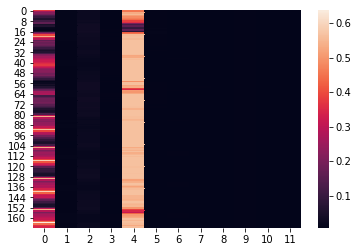

conv1d_155/kernel:0 (5, 12, 128)
[[[-0. -0.  0. ...  0.  0.  0.]
  [-0. -0.  0. ...  0. -0.  0.]
  [ 0. -0. -0. ...  0. -0.  0.]
  ...
  [ 0. -0. -0. ... -0.  0.  0.]
  [-0.  0.  0. ... -0. -0.  0.]
  [ 0. -0. -0. ...  0. -0.  0.]]

 [[-0. -0.  0. ...  0. -0.  0.]
  [-0. -0.  0. ... -0.  0.  0.]
  [-0. -0.  0. ... -0. -0. -0.]
  ...
  [-0.  0. -0. ...  0. -0.  0.]
  [ 0.  0. -0. ...  0. -0.  0.]
  [ 0.  0. -0. ...  0.  0. -0.]]

 [[-0.  0. -0. ... -0.  0. -0.]
  [ 0. -0. -0. ...  0.  0. -0.]
  [-0. -0. -0. ... -0.  0.  0.]
  ...
  [-0. -0.  0. ... -0. -0.  0.]
  [ 0.  0.  0. ... -0.  0. -0.]
  [ 0. -0. -0. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  0. -0.  0.]
  [-0.  0.  0. ...  0. -0.  0.]
  [-0.  0.  0. ... -0. -0. -0.]
  ...
  [ 0. -0. -0. ...  0.  0. -0.]
  [-0. -0. -0. ...  0. -0. -0.]
  [ 0.  0. -0. ...  0.  0.  0.]]

 [[-0.  0. -0. ... -0.  0. -0.]
  [ 0. -0.  0. ... -0. -0.  0.]
  [ 0. -0.  0. ... -0.  0. -0.]
  ...
  [-0.  0. -0. ...  0. -0.  0.]
  [ 0.  0. -0. ... -0.  0.  0.]
 

In [546]:
from tensorflow.keras.models import Model

chars = '0123456789+ '
ctable = CharacterTable(chars)
i = 10
output_final = model.predict(np.array([testX[i]]))

#print(ctable.decode(valX[i]),
 #     ctable.decode(valY[i]),
  #    ctable.decode(output_final[0]))

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[0].output)
output = intermediate_layer_model.predict(np.array([testX[i]]))
print(output.shape)

import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# h = np.reshape(output[0], (-1, 8))
# sns.heatmap(h)
sns.heatmap(output[0])
plt.show()

# %% Print weights.
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

# suppress scientific notation
np.set_printoptions(suppress=True)
for name, weight in zip(names, weights):
    print(name, weight.shape)
    print(weight)

### Timedistributed CNN-LSTM

### 단일 모델로 간다면 이거

In [582]:
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1], trainX.shape[2]))
valX = np.reshape(valX, (valX.shape[0],1, valX.shape[1],valX.shape[2]))
testX = np.reshape(testX, (testX.shape[0],1,testX.shape[1], testX.shape[2] ))

In [583]:

### cnn-LSTM

from tensorflow.keras.models import *

first_input = Input(shape=(None,168,12))

in1=TimeDistributed(Conv1D(filters=64, kernel_size=5, activation='relu'))(first_input)
#in1= BatchNormalization(scale=False)(in1)
#in0=TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'))(in1)
#in1= BatchNormalization(scale=False)(in0)

in1=TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'))(in1)

#in1=add([in0,in1],name='extractor')
in1=TimeDistributed(MaxPooling1D(pool_size=2,name='extractor'))(in1)
in1=TimeDistributed(Flatten())(in1)
#model.add(LSTM(units = 128, return_sequences=True))
in1=LSTM(units =100 , return_sequences=True)(in1)
in1=LSTM(units=50)(in1)
#lstm_out=Bidirectional(LSTM(units =100 , return_sequences=False))(lstm_out)

#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1, in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2)(in1)

#flat_out = Flatten()(in1)
#flat_out=Dense(20, activation='relu')(flat_out)
#model.add(Dropout(drop_dense))
#in1=Dropout(0.5)(in1)

out1=Dense(24, activation = 'relu')(in1)
model=Model(inputs=first_input, outputs=out1)
model.compile(optimizer='adam', loss='mse')

checkpoint_path = "saved_weights/bike_cnnlstm_exp.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

# fit model9
#history=model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

In [474]:
trainX.shape

(6816, 1, 168, 12)

In [584]:
model.summary()

Model: "model_188"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_70 (InputLayer)        [(None, None, 168, 12)]   0         
_________________________________________________________________
time_distributed_64 (TimeDis (None, None, 164, 64)     3904      
_________________________________________________________________
time_distributed_65 (TimeDis (None, None, 164, 64)     4160      
_________________________________________________________________
time_distributed_66 (TimeDis (None, None, 82, 64)      0         
_________________________________________________________________
time_distributed_67 (TimeDis (None, None, 5248)        0         
_________________________________________________________________
lstm_66 (LSTM)               (None, None, 100)         2139600   
_________________________________________________________________
lstm_67 (LSTM)               (None, 50)                30

In [585]:
model.load_weights("saved_weights/bike_cnnlstm_exp.hdf5")

In [589]:
img=testX[i]

img_tensor = np.expand_dims(img, axis=0)
print(img_tensor.shape)
img_tensor=img_tensor.reshape(1,168,12,1)
scorecam = ScoreCam(model,img_tensor,'time_distributed_66')
print(scorecam)

plt.show()

(1, 1, 168, 12)


ValueError: Error when checking input: expected input_70 to have shape (None, 168, 12) but got array with shape (168, 12, 1)

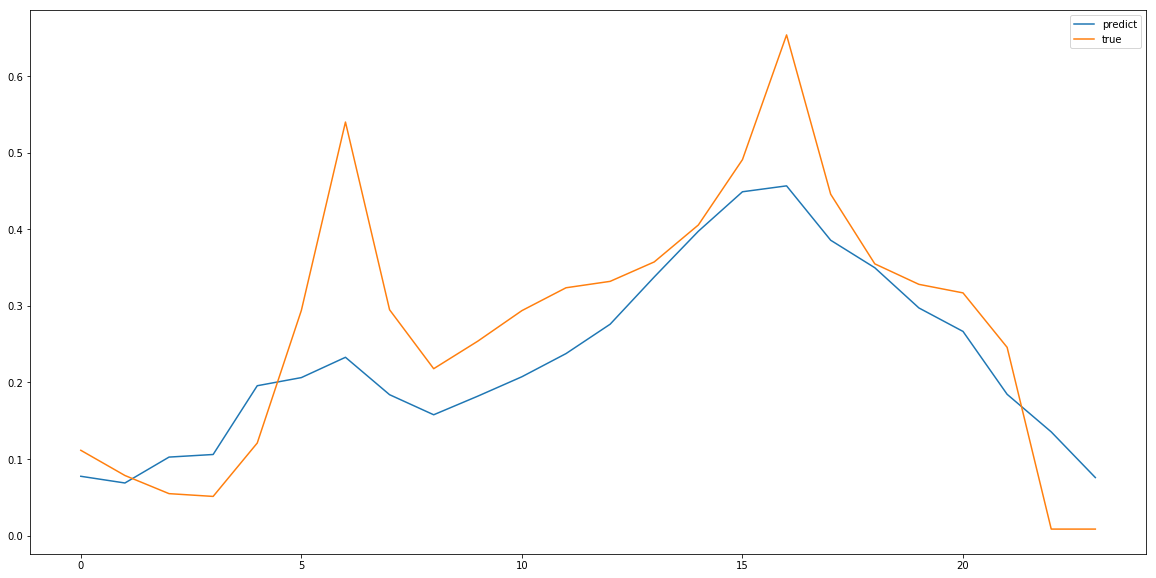

Test RMSE: 0.09698
Test MAE: 0.07315
Test MSE: 0.00941
Test RMSE: 347.83460
Test MAE: 262.34277


In [471]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[15]
testy=testY[15]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)


In [489]:
aug_rm=[]
aug_ma=[]
for k in j:

    yhat = model.predict([testX])
    yhat=yhat[24*k]
    testy=testY[24*k]
    yhat=yhat.reshape(-1,1)
    testy=testy.reshape(-1,1)
    rmse = sqrt(mean_squared_error(testy, yhat))
    mae = mean_absolute_error(testy, yhat)
    print('Test MAE: %.5f' % mae)
    print('Test RMSE: %.5f' % rmse)
    aug_rm.append(rmse)
    aug_ma.append(mae)

    
print(np.mean(aug_rm))
print(np.mean(aug_ma))

Test MAE: 0.03310
Test RMSE: 0.05232
Test MAE: 0.03127
Test RMSE: 0.03778
Test MAE: 0.03671
Test RMSE: 0.05268
Test MAE: 0.10233
Test RMSE: 0.12960
Test MAE: 0.05417
Test RMSE: 0.08476
Test MAE: 0.03884
Test RMSE: 0.05470
Test MAE: 0.02902
Test RMSE: 0.03682
Test MAE: 0.07190
Test RMSE: 0.09806
Test MAE: 0.04611
Test RMSE: 0.05851
Test MAE: 0.04721
Test RMSE: 0.05774
Test MAE: 0.04338
Test RMSE: 0.05402
Test MAE: 0.06654
Test RMSE: 0.07931
Test MAE: 0.05260
Test RMSE: 0.07551
Test MAE: 0.08525
Test RMSE: 0.10152
Test MAE: 0.04886
Test RMSE: 0.06865
0.06946420561423541
0.052486945


### LSTM-CNN

In [187]:
from tensorflow.keras.models import Model

first_input = Input(shape=(168,8))

in1=LSTM(units =150 , return_sequences=True)(first_input)

#in1=TimeDistributed(Conv1D(filters=64, kernel_size=2, activation='relu'))(in1)
#in1= BatchNormalization(scale=False)(in1)
in1=Conv1D(filters=64, kernel_size=5, activation='relu')(in1)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu')(in1)

#in1=add([in0,in1],name='extractor')
in1=MaxPooling1D(pool_size=2,name='extractor')(in1)

in1=Flatten()(in1)
#model.add(LSTM(units = 128, return_sequences=True))
#in1=LSTM(units =50 , return_sequences=False)(in1)
#lstm_out=Bidirectional(LSTM(units =100 , return_sequences=False))(lstm_out)

#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1, in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2)(in1)

#flat_out = Flatten()(in1)
#flat_out=Dense(20, activation='relu')(flat_out)
#model.add(Dropout(drop_dense))

out1=Dense(24, activation = 'relu')(in1)
model=Model(inputs=first_input, outputs=out1)
model.compile(optimizer='adam', loss='mse')

checkpoint_path = "saved_weights/bike_lstmcnn_mulstep.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

In [188]:
model.summary()

Model: "model_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 168, 8)]          0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 168, 150)          95400     
_________________________________________________________________
conv1d_69 (Conv1D)           (None, 164, 64)           48064     
_________________________________________________________________
conv1d_70 (Conv1D)           (None, 164, 64)           4160      
_________________________________________________________________
extractor (MaxPooling1D)     (None, 82, 64)            0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5248)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 24)                125

In [192]:
history=model.fit(trainX, trainY, epochs=100, batch_size=100, validation_data=(valX, valY), verbose=1, callbacks=[cb])

Train on 6816 samples, validate on 684 samples
Epoch 1/100
6800/6816 [============================>.] - ETA: 0s - loss: 0.0191
Epoch 00001: val_loss improved from inf to 0.02844, saving model to saved_weights/bike_lstmcnn_mulstep.hdf5
6816/6816 [==============================] - 11s 2ms/sample - loss: 0.0191 - val_loss: 0.0284
Epoch 2/100
6800/6816 [============================>.] - ETA: 0s - loss: 0.0109
Epoch 00002: val_loss improved from 0.02844 to 0.02719, saving model to saved_weights/bike_lstmcnn_mulstep.hdf5
6816/6816 [==============================] - 10s 1ms/sample - loss: 0.0109 - val_loss: 0.0272
Epoch 3/100
6800/6816 [============================>.] - ETA: 0s - loss: 0.0097
Epoch 00003: val_loss improved from 0.02719 to 0.02461, saving model to saved_weights/bike_lstmcnn_mulstep.hdf5
6816/6816 [==============================] - 10s 1ms/sample - loss: 0.0097 - val_loss: 0.0246
Epoch 4/100
6800/6816 [============================>.] - ETA: 0s - loss: 0.0082
Epoch 00004: val_lo

KeyboardInterrupt: 

In [193]:
model.load_weights("saved_weights/bike_lstmcnn_mulstep.hdf5")

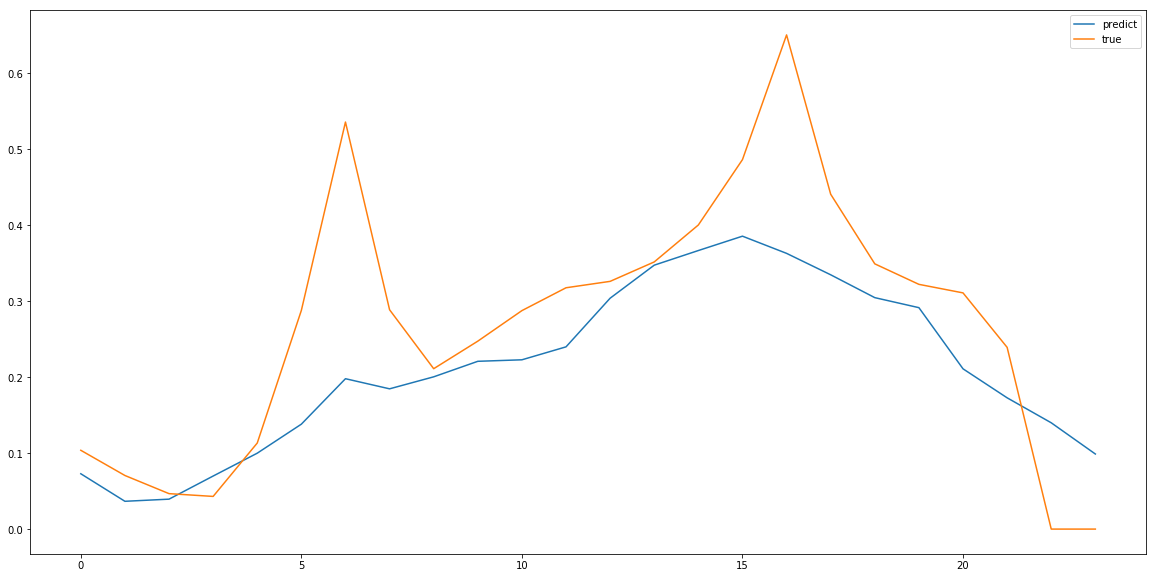

Test RMSE: 0.11441
Test MAE: 0.07996
Test MSE: 0.01309
Test RMSE: 410.33239
Test MAE: 286.79813


In [194]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
plt.figure(figsize=(20,10))
yhat=yhat[15]
testy=testY[15]
yhat=yhat.reshape(-1,1)
testy=testy.reshape(-1,1)
pyplot.plot(yhat, label='predict')
pyplot.plot(testy, label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testy, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testy, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testy*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

(1, 22, 64)


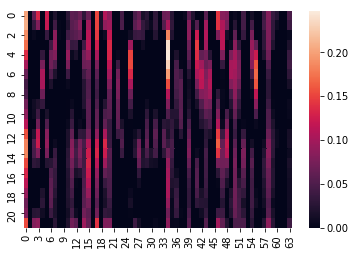

lstm_2/kernel:0 (8, 600)
[[ 0.  0. -0. ... -0. -0.  0.]
 [ 0.  0.  0. ...  0.  0. -0.]
 [ 0. -0. -0. ... -0. -0.  0.]
 ...
 [-0. -0.  0. ...  0. -0.  0.]
 [ 0.  0.  0. ...  0. -0.  0.]
 [ 0. -0.  0. ...  0.  0. -0.]]
lstm_2/recurrent_kernel:0 (150, 600)
[[-0.  0.  0. ... -0.  0.  0.]
 [-0.  0. -0. ... -0. -0.  0.]
 [ 0. -0.  0. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ... -0. -0.  0.]
 [ 0. -0.  0. ... -0. -0. -0.]
 [ 0. -0. -0. ... -0.  0.  0.]]
lstm_2/bias:0 (600,)
[ 0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0. -0.  0. -0.  0. -0. -0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0.  0.
  0.  0.  0.  0. -0.  0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0.  0.  0.
  0. -0. -0.  0. -0.  0. -0. -0.  0.  0.  0.  0. -0. -0.  0. -0. -0.  0.
  0.  0. -0. -0.  0.  0.  0. -0.  0.  0.  0. -0.  0.  0. -0. -0.  0. -0.
  0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0. -0.  0.  0. -0.
  0.  0. -0.  0. -0. -0.  0.  0.  0. -0. -0. -0.  0.  0. -0. -0. -0. -0.
  0. -0. -0.  0.  0. -

In [40]:
from tensorflow.keras.models import Model

chars = '0123456789+ '
ctable = CharacterTable(chars)
i = 0
output_final = model.predict(np.array([testX[i]]))

#print(ctable.decode(valX[i]),
 #     ctable.decode(valY[i]),
  #    ctable.decode(output_final[0]))

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[4].output)
output = intermediate_layer_model.predict(np.array([testX[i]]))
print(output.shape)

import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# h = np.reshape(output[0], (-1, 8))
# sns.heatmap(h)
sns.heatmap(output[0])
plt.show()

# %% Print weights.
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

# suppress scientific notation
np.set_printoptions(suppress=True)
for name, weight in zip(names, weights):
    print(name, weight.shape)
    print(weight)

In [14]:
cols

Index(['Rented Bike Count', 'Temperature(캜)', 'Humidity(%)',
       'Wind speed (m/s)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [196]:
def gradient_importance(seq, model):

    seq = tf.Variable(seq[np.newaxis,:,:], dtype=tf.float32)

    with tf.GradientTape() as tape:
        predictions = model(seq)

    grads = tape.gradient(predictions, seq)
    grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    
    return grads



def activation_grad(seq, model):
    
    seq = seq[np.newaxis,:,:]
    grad_model = Model([model.inputs], 
                       [model.get_layer('extractor').output, 
                        model.output])

    # Obtain the predicted value and the intermediate filters
    with tf.GradientTape() as tape:
        seq_outputs, predictions = grad_model(seq)

    # Extract filters and gradients
    output = seq_outputs[0]
    grads = tape.gradient(predictions, seq_outputs)[0]

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=0)
    
    # Get a ponderated map of filters according to grad importance
    cam = np.ones(output.shape[0], dtype=np.float32)
    for index, w in enumerate(weights):
        cam += w * output[:, index]

    time = int(seq.shape[1]/output.shape[0])
    cam = zoom(cam.numpy(), time, order=1)
    heatmap = (cam - cam.min())/(cam.max() - cam.min())
    
    return heatmap

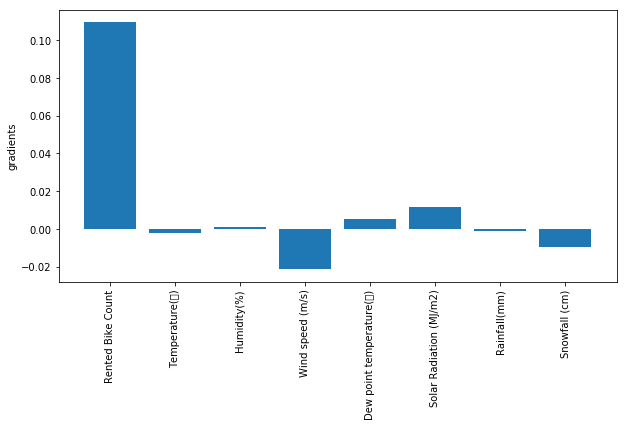

In [301]:

columns=cols
X_test=testX.copy()
id_=24*17
grad_imp = gradient_importance(X_test[id_], model)

plt.figure(figsize=(10,5))
plt.bar(range(len(grad_imp)), grad_imp)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylabel('gradients'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
np.set_printoptions(False)

In [299]:
id_=24*17

testX_inverse=X_test[id_][:,0]*(np.max(values)-np.min(values))+np.min(values)
testX_inverse

#X_test[id_][:,0].shape

array([ 745.,  734.,  786.,  809.,  591.,  635.,  728.,  660.,  687.,
        664.,  665.,  528.,  429.,  316.,  158.,   92.,   79.,  129.,
        392.,  982., 1683.,  908.,  658.,  761.,  865.,  866.,  863.,
       1063., 1173., 1454., 2009., 1448., 1273., 1169., 1001.,  677.,
        561.,  461.,  302.,  176.,  104.,  133.,  375., 1045., 1896.,
        968.,  686.,  765.,  867.,  889.,  905.,  958., 1168., 1402.,
       2147., 1512., 1188., 1142., 1105.,  694.,  587.,  491.,  299.,
        181.,  135.,  106.,  335., 1025., 1902.,  997.,  755.,  869.,
        941., 1006.,  979., 1042., 1116., 1515., 2188., 1446., 1249.,
       1219., 1053.,  733.,  585.,  463.,  285.,  190.,  125.,  143.,
        329.,  860., 1670., 1281.,  758.,  746.,  920.,  860.,  876.,
        949., 1102., 1398., 2021., 1430., 1125., 1102., 1040.,  697.,
        658.,  494.,  349.,  234.,  142.,  122.,  385.,  916., 1676.,
        969.,  674.,  811.,  863.,  897.,  892.,  973., 1105., 1327.,
       1942., 1284.,

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


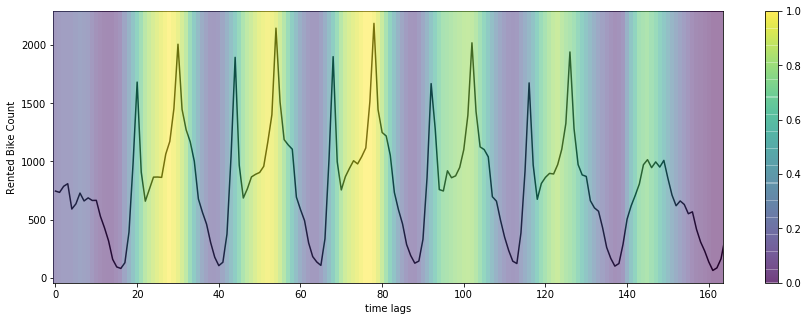

In [300]:
from scipy.ndimage import zoom
import random
import pylab

#id_=24*20


X_test=testX.copy()
activation = activation_grad(X_test[id_], model)
print(activation)
plt.figure(figsize=(15,5))

plt.plot(testX_inverse, 'k')
#plt.plot(yhat, label='predict')
#plt.plot(testY, label='true')
plt.ylabel('Rented Bike Count'); plt.xlabel('time lags'); #plt.title(pd.to_datetime(test_date[sequence_length+id_]))
plt.twinx()
#plt.xticks(a)
plt.imshow(np.vstack([activation]*120), alpha=0.5, cmap='viridis')
plt.axis('off'); plt.colorbar()
plt.axis('off')
#pylab.pcolor(np.vstack([activation]*120),cmap='jet',alpha=0.35)

#pylab.colorbar()

np.set_printoptions(False)

In [206]:
X_test.shape

(684, 168, 8)